In [10]:
import numpy as np
import pandas as pd
import keras
import os
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from matplotlib import pyplot as plt

In [11]:
IMAGE_SIZE = 150
LABELS = ['Glioma','Meningioma','No Tumor','Pituitary']
BASEDIR = 'dataset/'
TRAINING_DIR = os.path.join(BASEDIR, 'Train/')
X_train = []
y_train = []

In [12]:
for case in LABELS:
    folderPath = os.path.join(TRAINING_DIR, case)
    folderPath = os.path.join(folderPath, 'images/')
    for image in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, image), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
        X_train.append(img)
        y_train.append(case)

X_train = np.array(X_train)
y_train = np.array(y_train)

'Glioma'

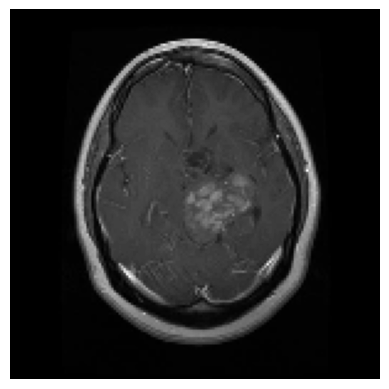

In [17]:
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
y_train[0]

*The images from the dataset were stored in the same order the directories were read, so now we have to randomize them*

In [19]:
X_train, y_train = shuffle(X_train, y_train, random_state=101)
X_train.shape

(4737, 150, 150)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [21]:
y_train_new = [LABELS.index(case) for case in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new, num_classes=4)

y_test_new = [LABELS.index(case) for case in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new, num_classes=4)

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 conv2d_4 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 64)        36928     
                                                      

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
12/94 [==>...........................] - ETA: 3:01 - loss: 2.4902 - accuracy: 0.2786

In [ ]:
y_pred = model.predict(X_test)